In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path: performance.ipynb
# Read in the data
trip_data = pd.read_csv('performance_data.csv')

In [17]:
trip_data.head()

,trip_id,device_id,date,start_time,end_time,start_terminal,end_terminal,travel_time,dwell_time,SITR,day_of_week,day_name,hour_of_day,weekend,rush_hour,excess_travel_time,Direction,anomaly_score,behaviour
0,1,116,2022-09-01,08:21:45,09:14:24,Digana,Kandy,52.650000,9.083333,0.172523,3,Thursday,8.25,0,1,-4.916667,Digana-Kandy,1,normal
1,2,116,2022-09-01,10:22:41,11:19:49,Kandy,Digana,57.133333,6.366667,0.111435,3,Thursday,10.50,0,0,-0.433333,Kandy-Digana,1,normal
2,3,116,2022-09-01,13:11:16,14:14:46,Digana,Kandy,63.500000,10.933333,0.172178,3,Thursday,13.25,0,0,5.933333,Digana-Kandy,1,normal
3,4,116,2022-09-01,16:32:13,17:29:30,Kandy,Digana,57.283333,4.750000,0.082921,3,Thursday,16.50,0,1,-0.283333,Kandy-Digana,-1,anomaly
4,5,116,2022-09-02,08:00:08,08:54:00,Digana,Kandy,53.866667,8.283333,0.153775,4,Friday,8.00,0,1,-3.700000,Digana-Kandy,1,normal


# Average Travel Time by Hour of the Day and Weekend Status

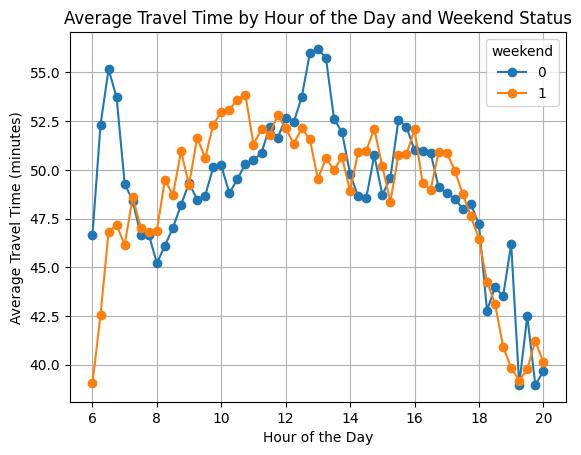

In [18]:
# Example: Creating a line chart for average travel time by hour of the day and weekend status
hourly_avg = trip_data.groupby(['hour_of_day', 'weekend'])['travel_time'].mean()
hourly_avg.unstack().plot(kind='line', marker='o')
plt.title('Average Travel Time by Hour of the Day and Weekend Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Travel Time (minutes)')
plt.grid()
plt.show()

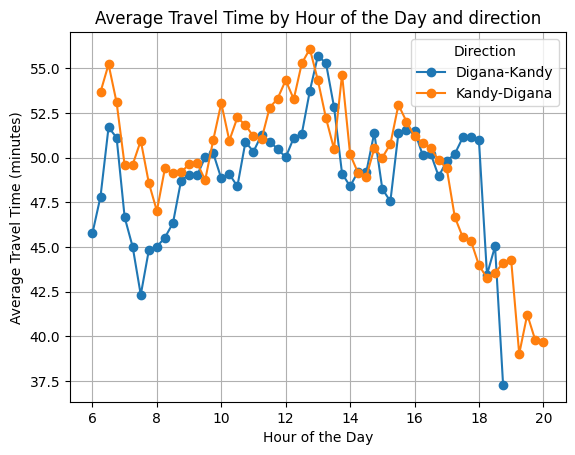

In [20]:
# Example: Creating a line chart for average travel time by hour of the day and direction
hourly_avg = trip_data.groupby(['hour_of_day', 'Direction'])['travel_time'].mean()
hourly_avg.unstack().plot(kind='line', marker='o')
plt.title('Average Travel Time by Hour of the Day and direction')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Travel Time (minutes)')
plt.grid()
plt.show()


# bus behaviour

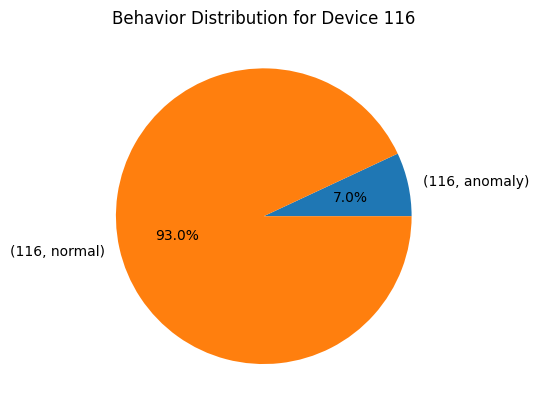

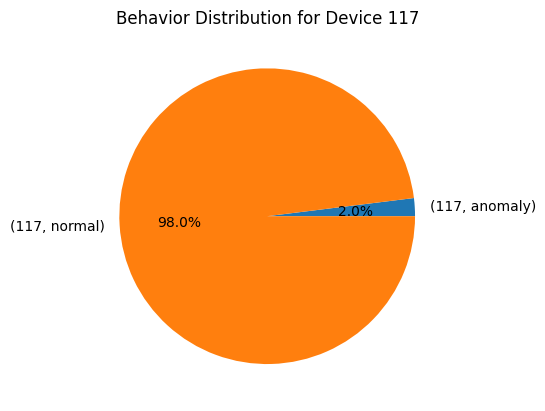

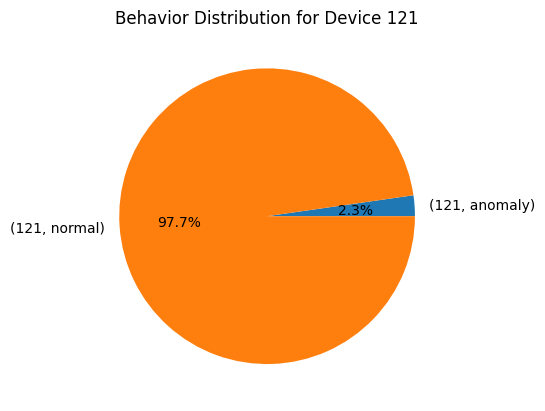

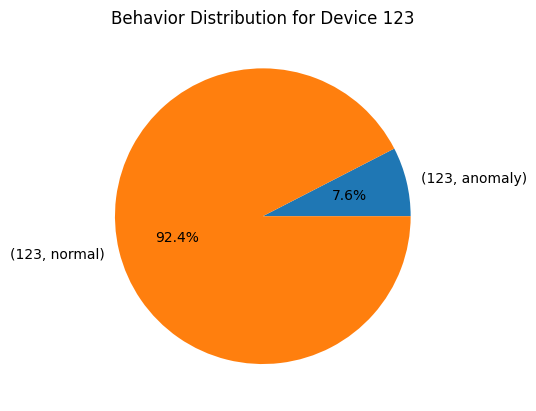

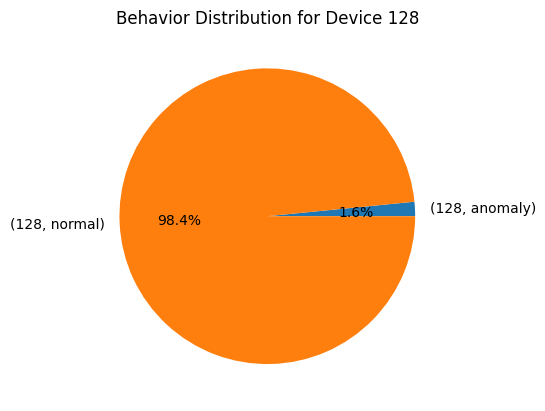

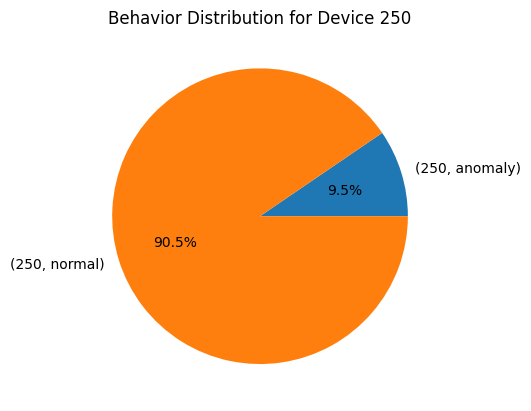

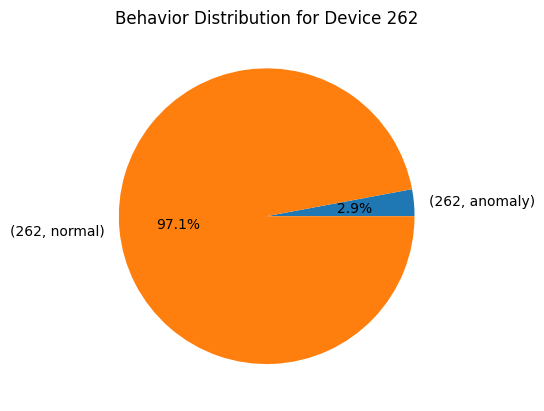

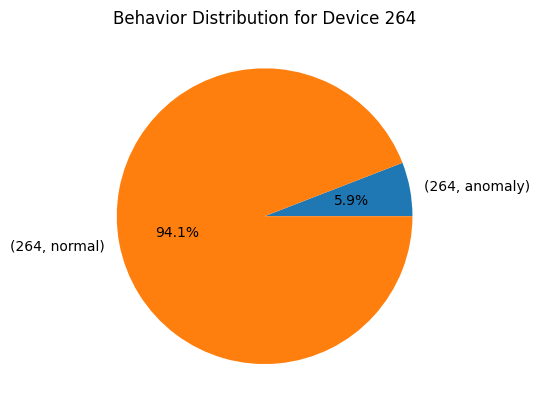

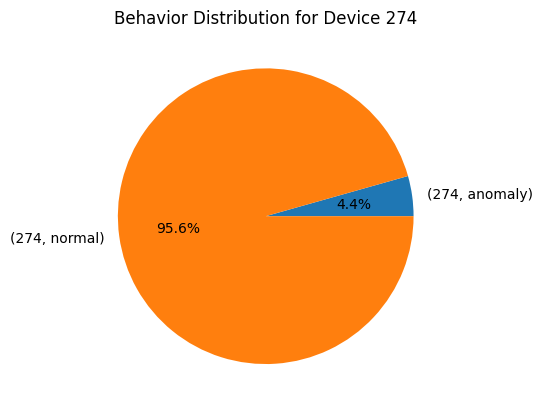

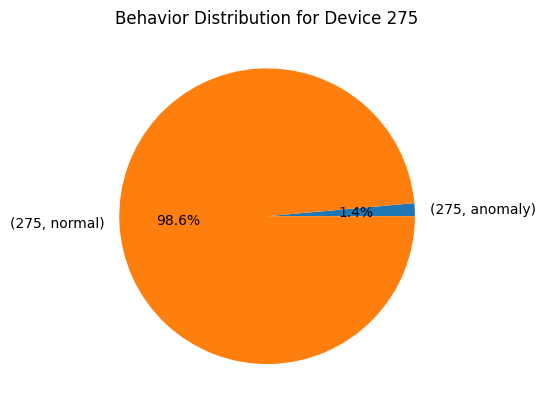

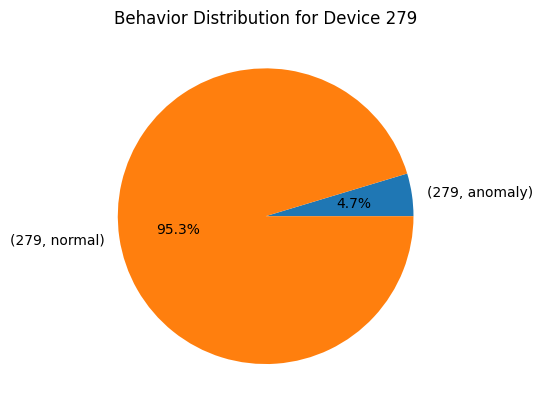

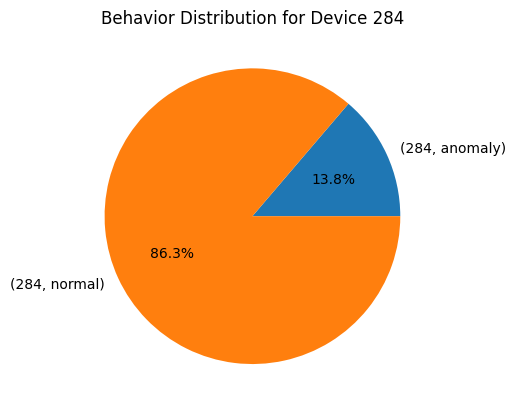

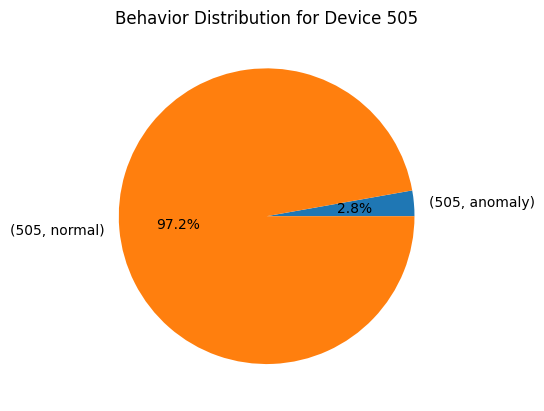

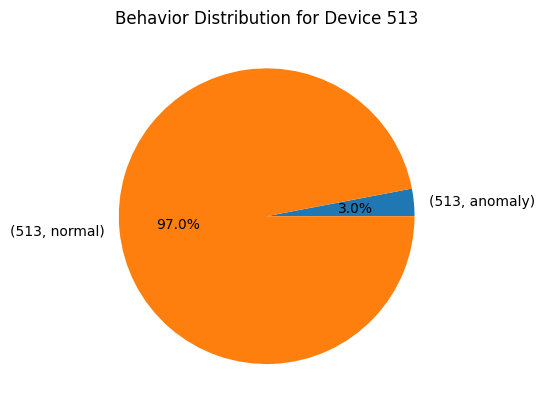

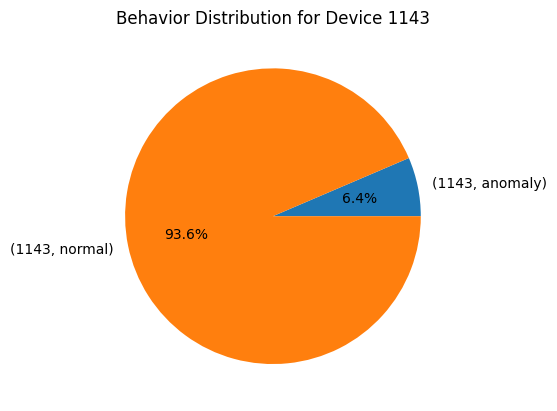

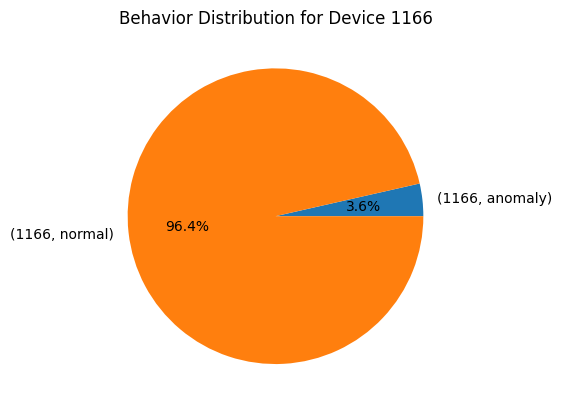

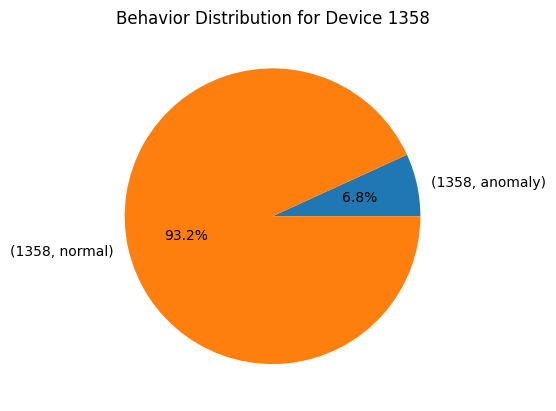

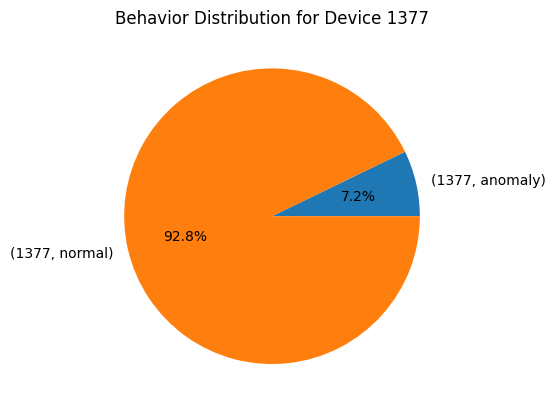

In [22]:
# Group the data by device_id and behaviour, and count the number of occurrences
counts = trip_data.groupby(['device_id', 'behaviour']).size()

# Create a pie chart for each device_id
for device_id, group in counts.groupby(level=0):
    group.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Behavior Distribution for Device {device_id}')
    plt.ylabel('')
    plt.show()